In [1]:
from env.simulators.market_simulator import MarketSimulator
from env.lob.red_black_tree import RedBlackTree
import numpy as np
import matplotlib.pyplot as plt

In [2]:
starting_value = 100
trading_hours = 6.5
trading_days = 252
annualized_return = 0.21
annualized_volatility = 0.3

# 1 minute
dt = 1 / trading_days / trading_hours / 60

# 1 day
t = 1 / trading_days 

risk_free_mean = annualized_return
risk_free_std = 0
volatility = annualized_volatility
spread_mean = 0
spread_std = 0

In [3]:
sim = MarketSimulator(
    starting_value=starting_value,
    risk_free_mean=risk_free_mean,
    risk_free_std=risk_free_std,
    volatility=volatility,
    spread_mean=spread_mean,
    spread_std=spread_std,
    dt=dt
)

In [4]:
sim.market_variables

{'last_transaction': 100,
 'midprice': 100,
 'risk_free_rate': 0.21,
 'spread': 0,
 'timestep': 0,
 'events': []}

In [5]:
sim.bid_process.sample(sim.market_variables["midprice"], dt)

100.15628671993349

In [6]:
sim.ask_process.sample(sim.market_variables["midprice"], dt)

99.88253383807132

In [7]:
sim.next_event

2.5599795538597153e-05

In [8]:
sim.event_process.sample(0, dt)

3.362670289043777e-05

In [9]:
ps = []
sim.reset()
sim.market_variables["last_transaction"]

100

In [53]:
t = sim.step()
p = sim.market_variables["last_transaction"]
ps.append(p)
print(np.sum([sim.bid_process.sample(p, dt) for _ in range(1000)]) / 1000)
print(np.sum([sim.ask_process.sample(p, dt) for _ in range(1000)]) / 1000)
print(p)
print(list(sim.lob.asks.ordered_traversal()))
print(list(sim.lob.bids.ordered_traversal()))

100.2137695486315
100.20865162414687
100.21000000000001
[<env.lob.red_black_tree.Node object at 0x7f0ac4364190>, <env.lob.red_black_tree.Node object at 0x7f0ac4398ad0>, <env.lob.red_black_tree.Node object at 0x7f0ac439b3d0>, <env.lob.red_black_tree.Node object at 0x7f0ac439a650>, <env.lob.red_black_tree.Node object at 0x7f0ac4398a10>, <env.lob.red_black_tree.Node object at 0x7f0ac43984d0>, <env.lob.red_black_tree.Node object at 0x7f0ac4364b10>, <env.lob.red_black_tree.Node object at 0x7f0ac43988d0>, <env.lob.red_black_tree.Node object at 0x7f0ac4364c10>, <env.lob.red_black_tree.Node object at 0x7f0ac43652d0>]
[<env.lob.red_black_tree.Node object at 0x7f0ac4399110>, <env.lob.red_black_tree.Node object at 0x7f0ac439a010>, <env.lob.red_black_tree.Node object at 0x7f0ac4399010>, <env.lob.red_black_tree.Node object at 0x7f0ac4399690>, <env.lob.red_black_tree.Node object at 0x7f0ac4399e90>, <env.lob.red_black_tree.Node object at 0x7f0ac439a190>, <env.lob.red_black_tree.Node object at 0x7f0ac

In [27]:
sim.next_event

0.00010044446585971147

In [28]:
sim.midprice()

100

In [59]:
print(np.mean([sim.bid_process.sample(p, dt) for _ in range(10000)]))
print(np.mean([sim.ask_process.sample(p, dt) for _ in range(10000)]))

100.0713931470284
100.07159631004214


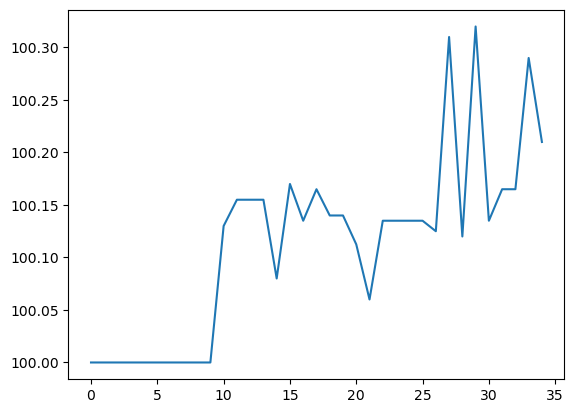

In [54]:
window = int(6.5 * 60)
moving_average = np.convolve(ps, np.ones(window) / window, mode='valid')
plt.plot(ps)

In [55]:
sim.reset()

while sim.market_timestep < 1:
    sim.step()
    p = sim.market_variables["last_transaction"]
    ps.append(p)
    
plt.plot(ps)

Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't find key in the tree
Couldn't f

KeyboardInterrupt: 

In [ ]:
dt

In [56]:
p = starting_value
ps = []
dt = dt
sim.bid_process.mean = .21
t = 0
T = 1
sim.bid_process.std = .18
while t < T: 
    p = sim.bid_process.sample(p, dt)
    ps.append(p)
    t += dt

returns = np.diff(ps) / ps[:-1]

In [60]:
np.std(returns) * np.sqrt(1 / dt)

0.1801636434432552

In [109]:
def run_sim(mean, std, dt):
    p = starting_value
    ps = []
    dt = dt
    sim.bid_process.mean = mean  # 1% per 1
    t = 0
    T = 1
    sim.bid_process.std = std
    while t < T: 
        p = sim.bid_process.sample(p, dt)
        ps.append(p)
        t += dt
    
    returns = np.diff(ps) / ps[:-1]
    
    return np.mean(returns), np.std(ps)

mean, std = 0.01, 0.1
print(np.mean([run_sim(mean, std, 1e-1) for _ in range(1000)], axis=0))
print(np.mean([run_sim(mean, std, 1e-2) for _ in range(1000)], axis=0))
print(np.mean([run_sim(mean, std, 1e-3) for _ in range(1000)], axis=0))

[1.47486661e-03 4.02262019e+00]
[7.32313937e-05 3.76342027e+00]
[7.75264128e-06 3.75342059e+00]


In [112]:
def simple_sim(dt):
    p = starting_value
    ps = []
    dt = dt
    sim.bid_process.mean = mean  # 1% per 1
    t = 0
    T = 1
    sim.bid_process.std = std
    while t < T: 
        p = sim.bid_process.sample(p, dt)
        ps.append(p)
        t += dt
    
    plt.plot(ps)

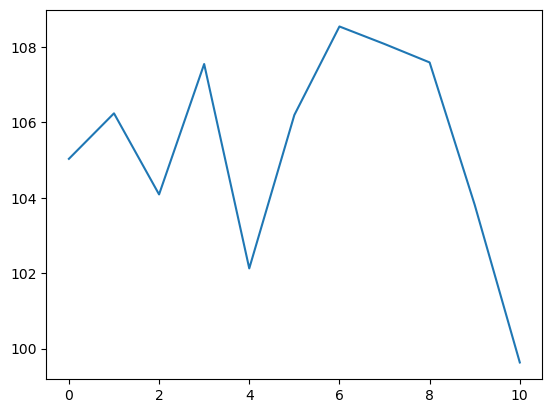

In [118]:
simple_sim(1e-1)

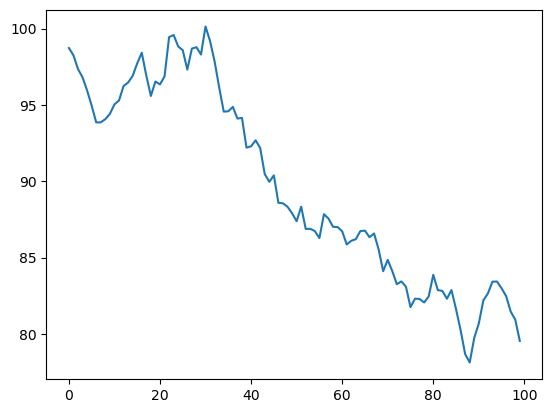

In [122]:
simple_sim(1e-2)

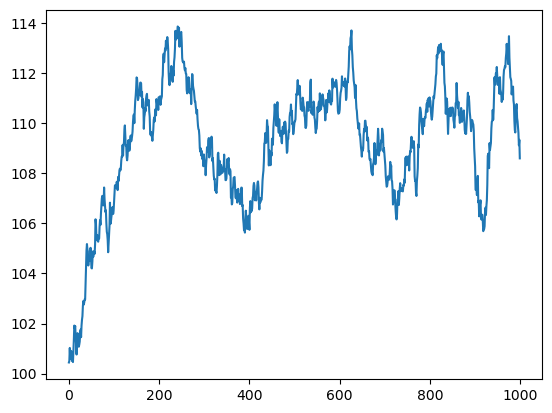

In [121]:
simple_sim(1e-3)